# Logistic-Regression Model

In [34]:
import pandas as pd
import numpy as np
import dtale
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [35]:
# import from df from other notebook
%store -r df_scaled
%store -r df_extended
%store -r df_interesting_scaled

In [36]:
df_extended = df_scaled

In [37]:
# get X and y values
X = df_extended.drop("TARGET", axis=1)
y = df_extended["TARGET"]

Possible Option for the future:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)



In [38]:
# splitting while keeping the proportion of the TARGET


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

# balancing the dataset with oversampling to get the same proportion of 0 and 1

balance_over = RandomOverSampler('auto', random_state=42)
balance_df_over = balance_over.fit_resample(X,y)
balance_df = balance_df_over
X_train = balance_df[0]
y_train = np.array(balance_df[1])


In [39]:
lr_model = LogisticRegression(class_weight="balanced")
lr_model.fit(X_train,y_train)

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = lr_model.predict(X_test)


In [41]:
y_prob = lr_model.predict_proba(X_test)[:,1]

In [42]:
cm_col_1 = confusion_matrix(y_test,y_pred)


In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)

0.7325792277477847

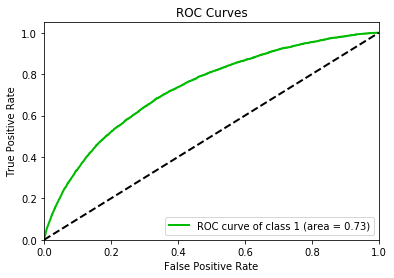

In [44]:
import scikitplot as skplt
import matplotlib.pyplot as plt


y_prob = lr_model.predict_proba(X_test)
y_prob
skplt.metrics.plot_roc(y_test, y_prob, plot_micro=False,plot_macro=False,classes_to_plot=[1])
plt.show()

In [45]:
print(classification_report(y_test, baseline_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70663
           1       0.00      0.00      0.00      6204

    accuracy                           0.92     76867
   macro avg       0.46      0.50      0.48     76867
weighted avg       0.85      0.92      0.88     76867

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     70663
           1       0.15      0.66      0.25      6204

    accuracy                           0.68     76867
   macro avg       0.56      0.67      0.52     76867
weighted avg       0.89      0.68      0.75     76867



/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [46]:

baseline_pred =  [0 for _ in range(len(y_test))]

roc_auc_score(y_test, baseline_pred)

0.5

# Gridsearch for best balance

In [47]:
np.arange(50,200,50)

array([ 50, 100, 150])

In [48]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.2, 5)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'max_iter': np.arange(50,200,50),
        'class_weight': [{0: x, 1: 1.0-x} for x in weights],
        'C': np.arange(0,2,0.1)
    },
    scoring='roc_auc',
    cv=3
)
grid_result = gsc.fit(X, y)

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning:

invalid value encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning:

invalid value encountered in multiply

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_sca

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning:

invalid value encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning:

invalid value encountered in multiply

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_sca

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning:

invalid value encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning:

invalid value encountered in multiply

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_sca

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning:

invalid value encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning:

invalid value encountered in multiply

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_sca

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning:

invalid value encountered in double_scalars

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning:

invalid value encountered in multiply

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning:

divide by zero encountered in double_sca

KeyboardInterrupt: 

In [ ]:
print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [ ]:
best_class_para = grid_result.best_params_["class_weight"]




In [ ]:
lr_model = LogisticRegression(max_iter=400, class_weight=best_class_para,C=0.01)
lr_model.fit(X_train,y_train)

In [ ]:
y_pred = lr_model.predict(X_test)


In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
pi = 3.141592

def feed_me(cm):
    return [item for sublist in cm for item in sublist]
revenue_list=[]
for cm in cm_col_1:
    tn, fp, fn, tp = feed_me(cm)
    total_n = sum(feed_me(cm))
    #print(tn,fp,fn,tp)
    actual_earnings = (tn * (2 * pi/100) * AMT_CREDIT_AVG)

    actual_loss = fn * AMT_CREDIT_AVG
    not_realized_earnings = (fp * (2 * pi/100) * AMT_CREDIT_AVG)
    not_realized_loss = tp * AMT_CREDIT_AVG
    revenue = actual_earnings - actual_loss
    revenue_list.append(revenue/total_n)
    print('\nActual Earnings:', actual_earnings), #print(tn)
    print('Actual Loss:', actual_loss), #print(fn)
    print('Not realized Earnings:', not_realized_earnings), #print(fp)
    print('\nRevenue:', revenue)
    print('Per credit:', revenue/total_n)
    print('\nPrevented Damage:', not_realized_loss), #print(tp)
    
